In [1]:
import torch

state = torch.load('../../cache/llama/ensemeble/per_query_token_cnt_diclist.pth', map_location='cpu')
ensemble_attn_mask_per_layer = state['ensemble_attn_mask_per_layer']
per_query_token_cnt_diclist = state['per_query_token_cnt_diclist']


In [2]:
len(per_query_token_cnt_diclist)

5120

In [3]:
per_query_token_cnt_diclist[0]

{32: 5,
 34: 5,
 36: 5,
 38: 5,
 40: 5,
 42: 5,
 44: 5,
 46: 5,
 96: 5,
 98: 5,
 100: 5,
 102: 5,
 112: 5,
 114: 5,
 116: 5,
 118: 5,
 120: 5,
 122: 5,
 124: 5,
 126: 5,
 128: 5,
 130: 5,
 132: 5,
 134: 5,
 184: 2,
 186: 2,
 188: 5,
 190: 5,
 192: 5,
 194: 5,
 196: 5,
 198: 5,
 200: 3,
 202: 3,
 208: 1,
 210: 1,
 212: 3,
 214: 3,
 216: 5,
 218: 5,
 220: 5,
 222: 5,
 224: 5,
 226: 5,
 228: 3,
 230: 3,
 244: 5,
 246: 5,
 248: 5,
 250: 5,
 266: 5,
 268: 5,
 298: 3,
 300: 3,
 302: 5,
 304: 5,
 306: 5,
 308: 5,
 310: 3,
 312: 3,
 322: 5,
 324: 5,
 326: 5,
 328: 5,
 378: 5,
 380: 5,
 382: 5,
 384: 5,
 402: 5,
 404: 5,
 406: 5,
 408: 5,
 410: 2,
 412: 2,
 414: 2,
 416: 2,
 422: 5,
 424: 5,
 426: 5,
 428: 5,
 466: 5,
 468: 5,
 470: 5,
 472: 5,
 482: 1,
 484: 1,
 486: 4,
 488: 4,
 490: 4,
 492: 4,
 494: 1,
 496: 1,
 572: 5,
 574: 5,
 576: 5,
 578: 5,
 580: 5,
 582: 5,
 584: 5,
 586: 5,
 588: 5,
 590: 5,
 592: 5,
 594: 5,
 636: 5,
 638: 5,
 640: 5,
 642: 5,
 692: 3,
 694: 3,
 696: 5,
 698: 5,
 7

In [ ]:
ensemble_hitmap = torch.zeros()

In [4]:
import matplotlib.pyplot as plt
import os

def plot(dic, i):
    # Unpack keys and values
    keys = list(dic[i].keys())
    values = list(dic[i].values())

    plt.figure(figsize=(10, 6))
    plt.bar(keys, values, color='skyblue')
    plt.xlabel('top_k index')
    plt.ylabel('model cnt')
    plt.title(f'ensemeble result of the {i}th query')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    plt.show()
    os.makedirs('../../cache/llama/ensemeble/viz', exist_ok=True)
    plt.savefig(f'../../cache/llama/ensemeble/viz/query_{i}.png')

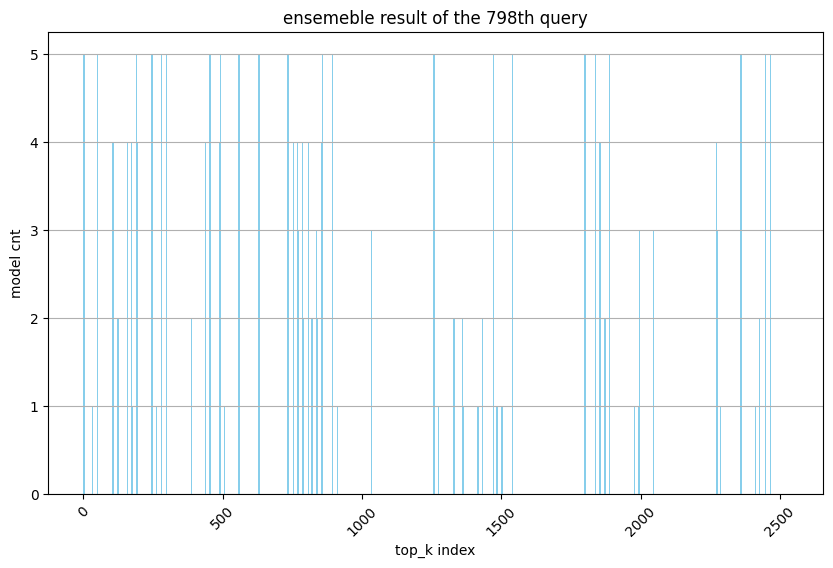

<Figure size 640x480 with 0 Axes>

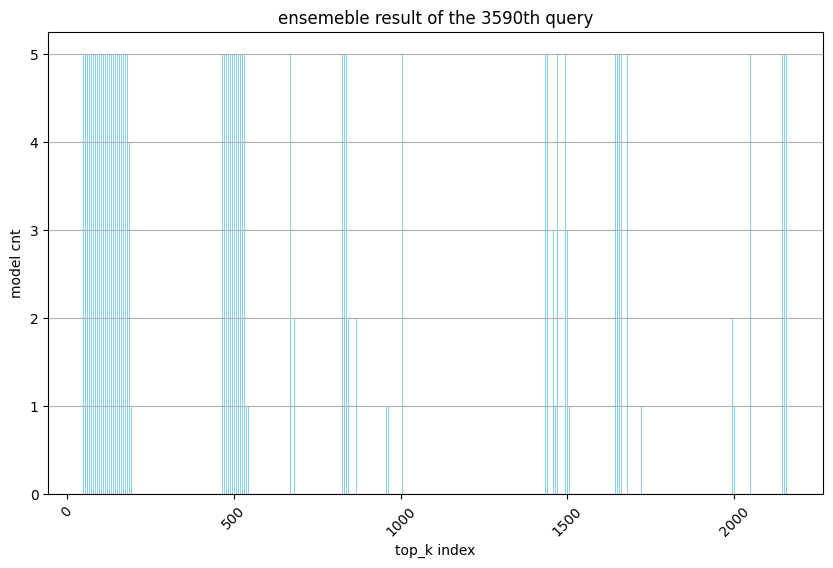

<Figure size 640x480 with 0 Axes>

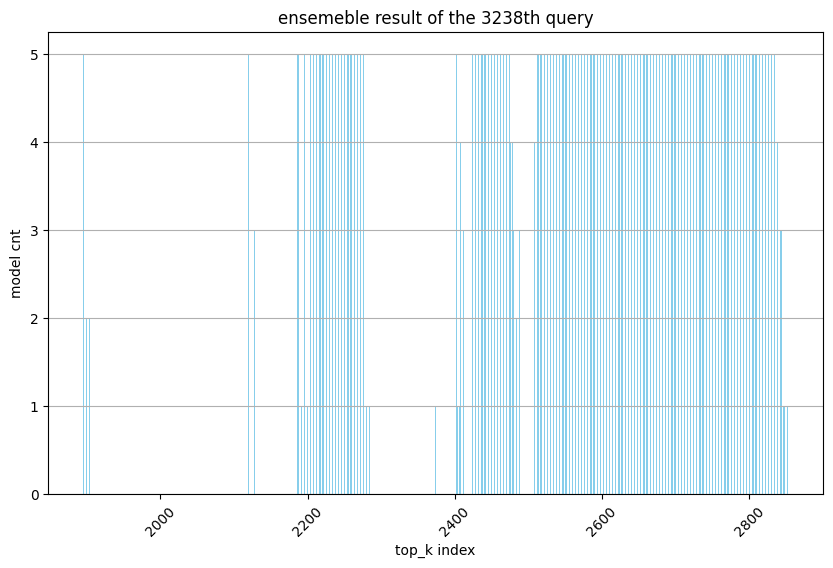

<Figure size 640x480 with 0 Axes>

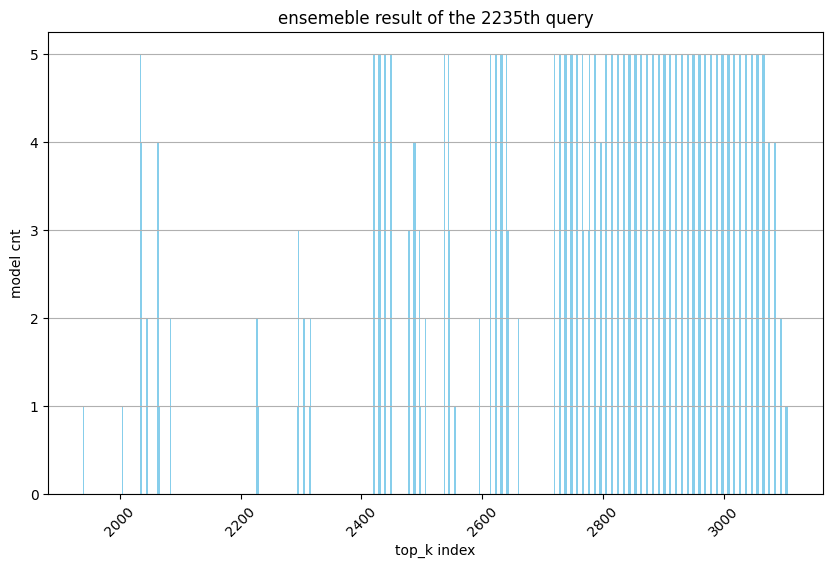

<Figure size 640x480 with 0 Axes>

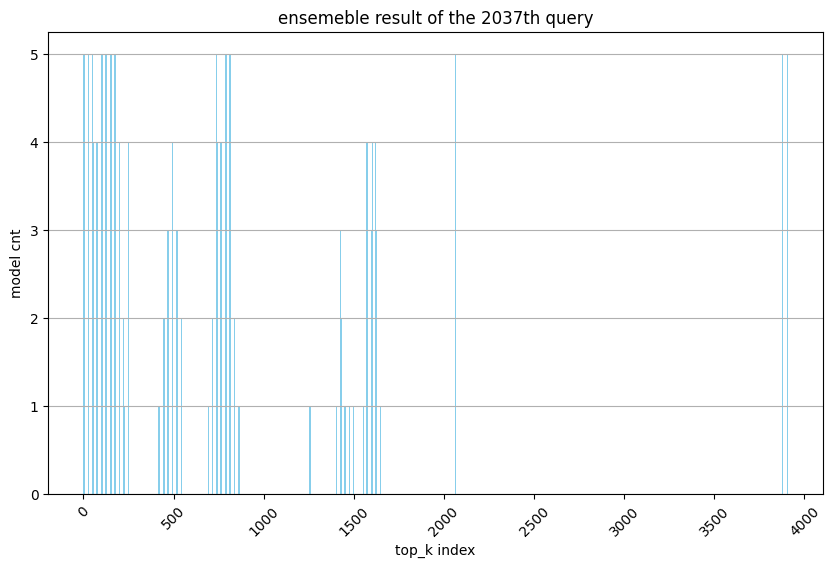

<Figure size 640x480 with 0 Axes>

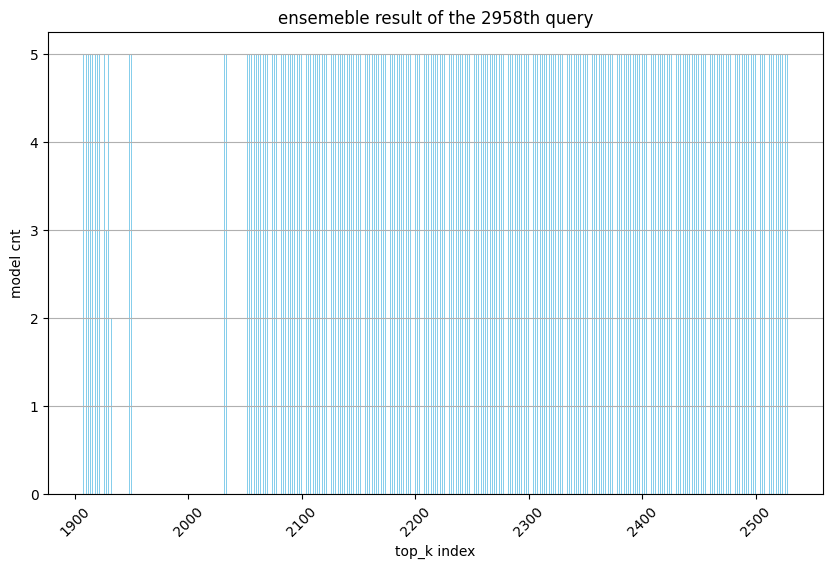

<Figure size 640x480 with 0 Axes>

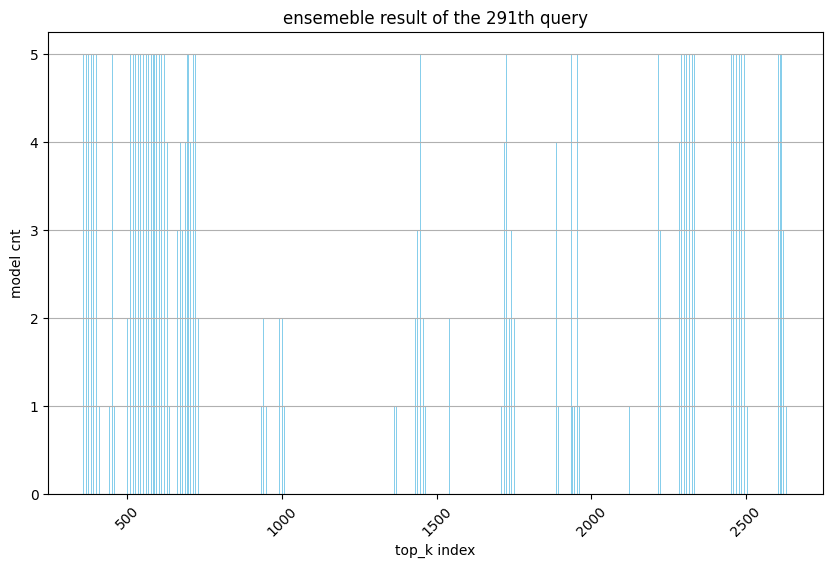

<Figure size 640x480 with 0 Axes>

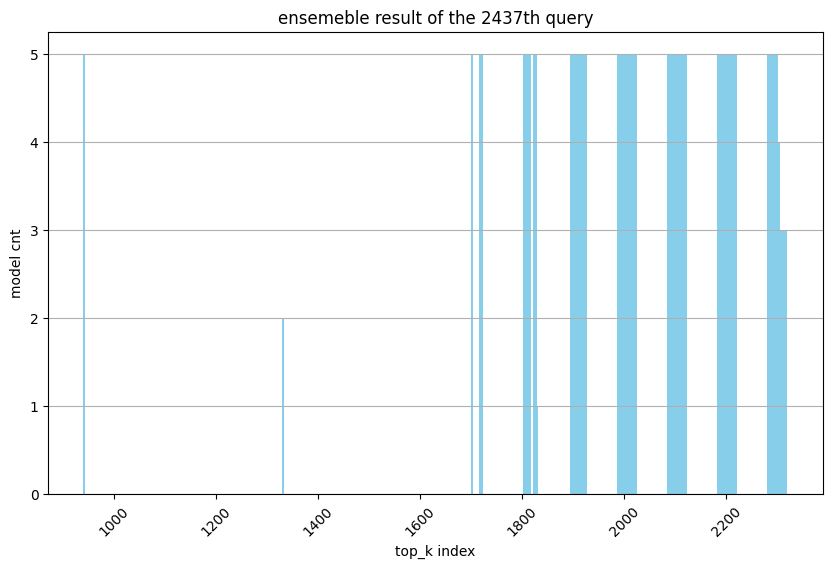

<Figure size 640x480 with 0 Axes>

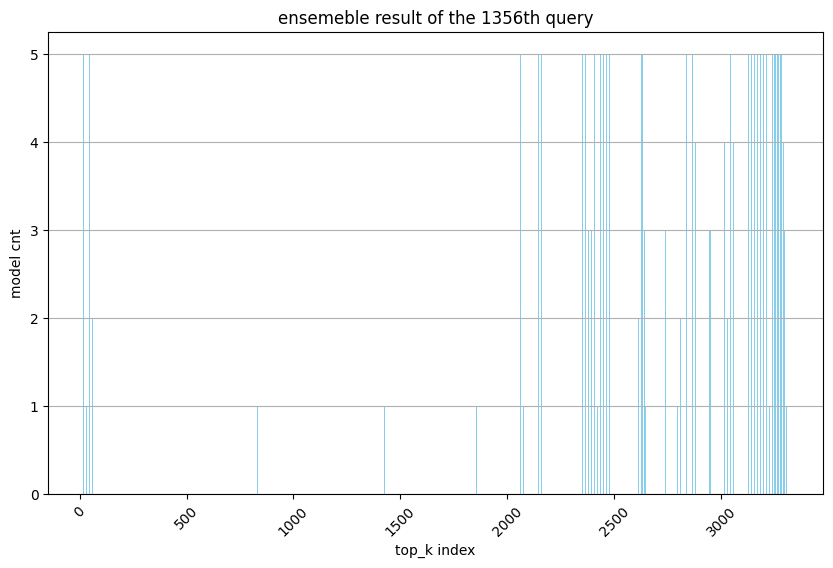

<Figure size 640x480 with 0 Axes>

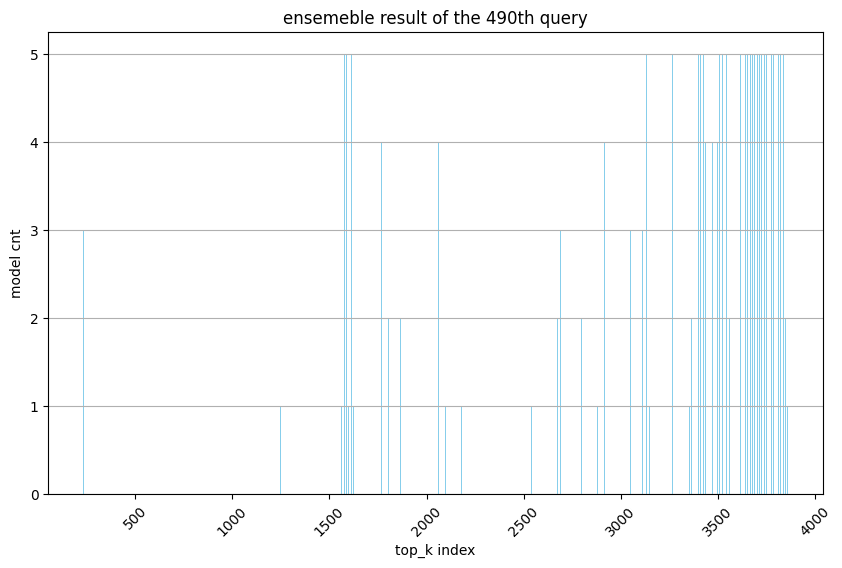

<Figure size 640x480 with 0 Axes>

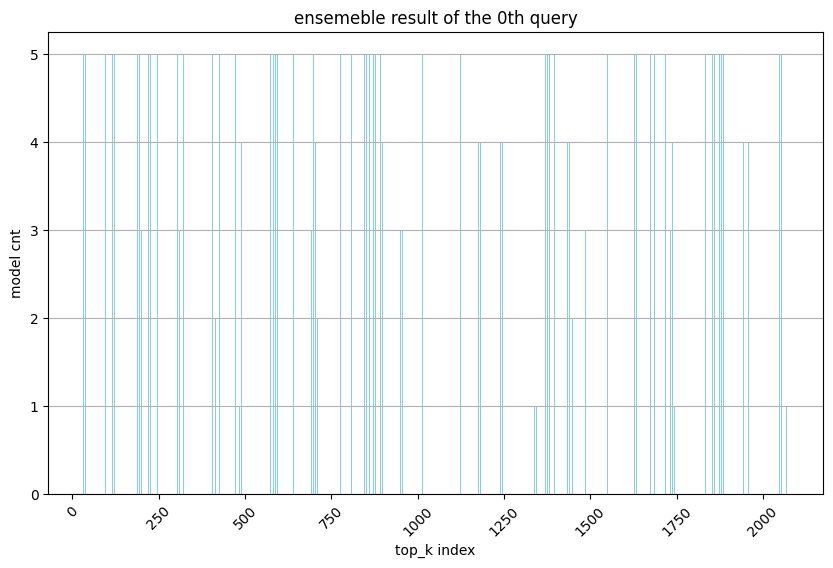

<Figure size 640x480 with 0 Axes>

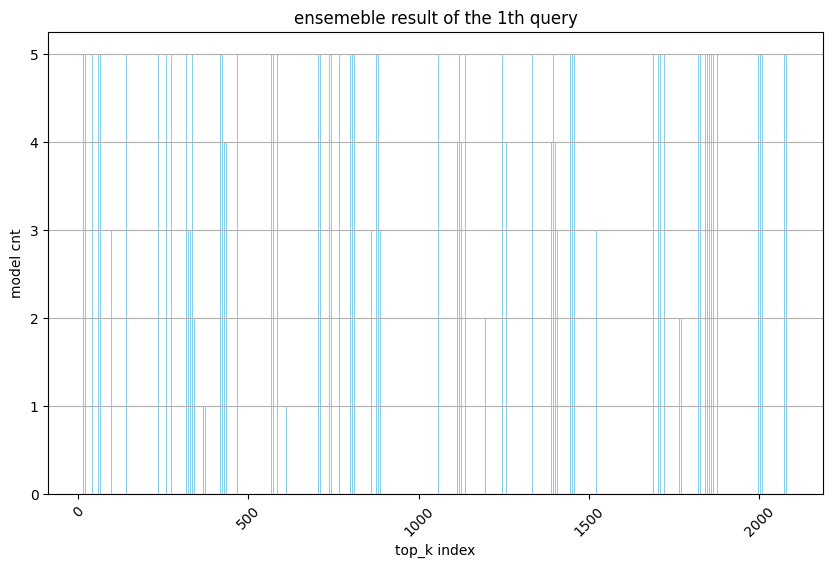

<Figure size 640x480 with 0 Axes>

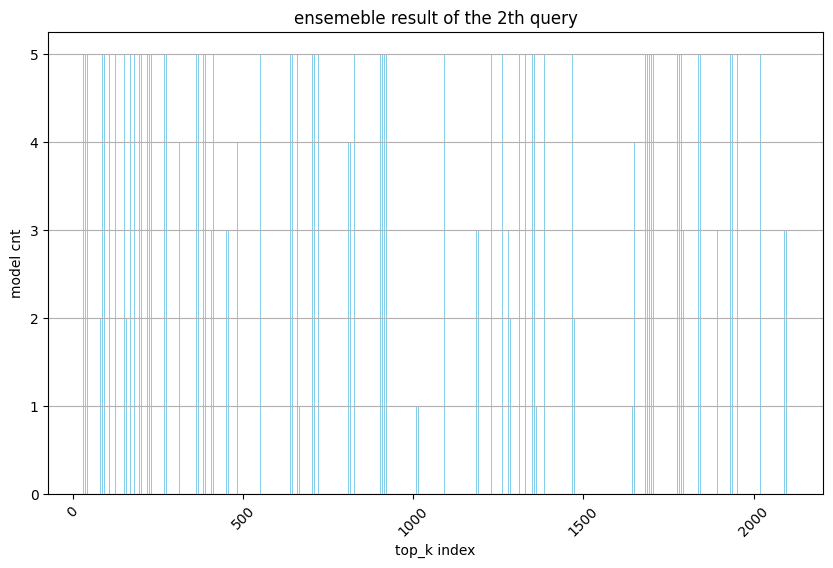

<Figure size 640x480 with 0 Axes>

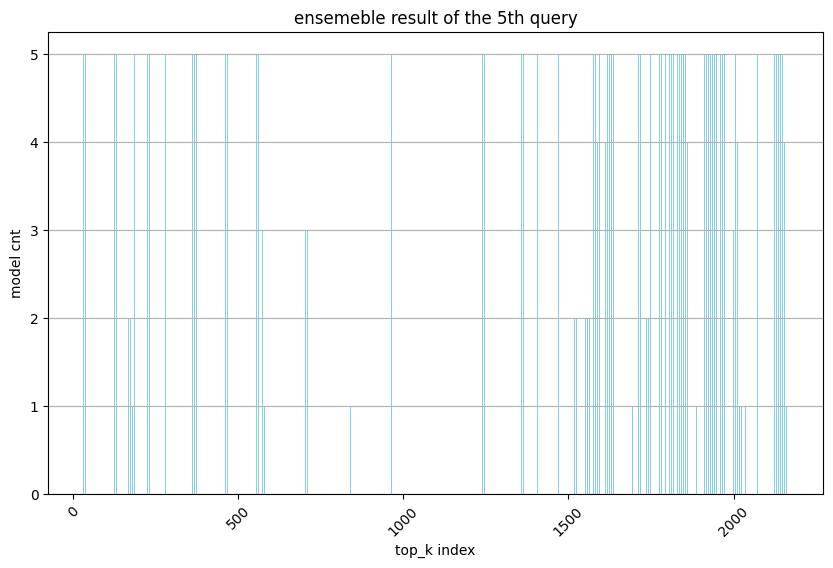

<Figure size 640x480 with 0 Axes>

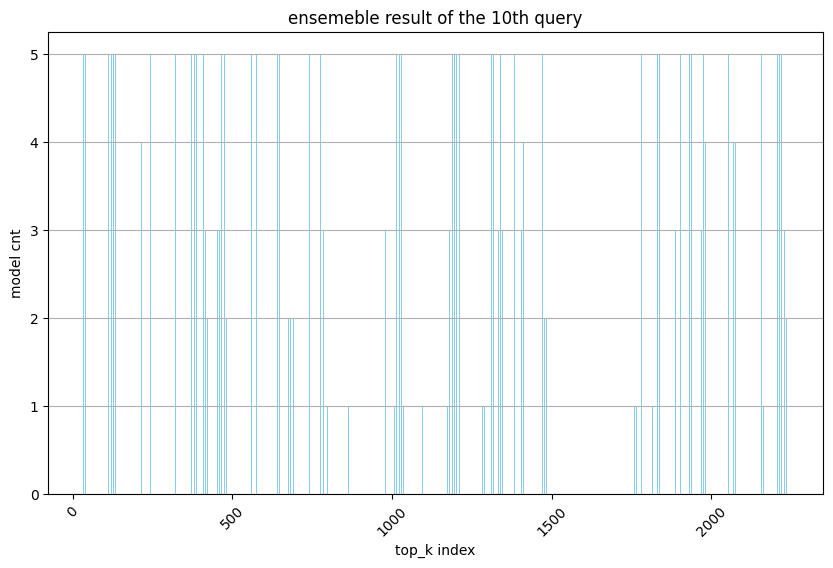

<Figure size 640x480 with 0 Axes>

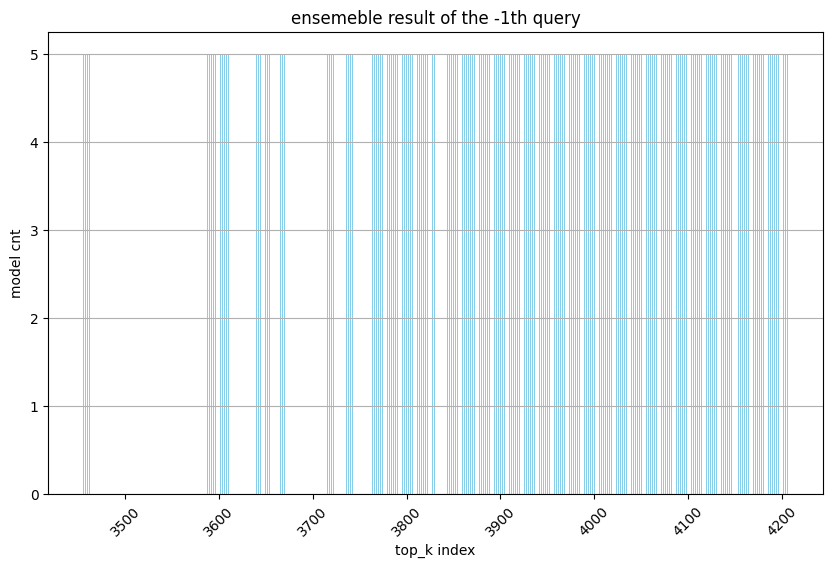

<Figure size 640x480 with 0 Axes>

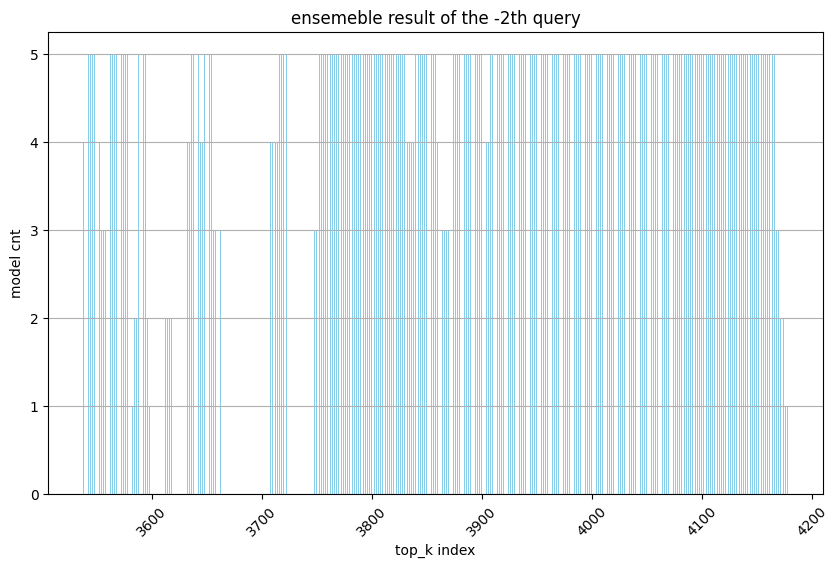

<Figure size 640x480 with 0 Axes>

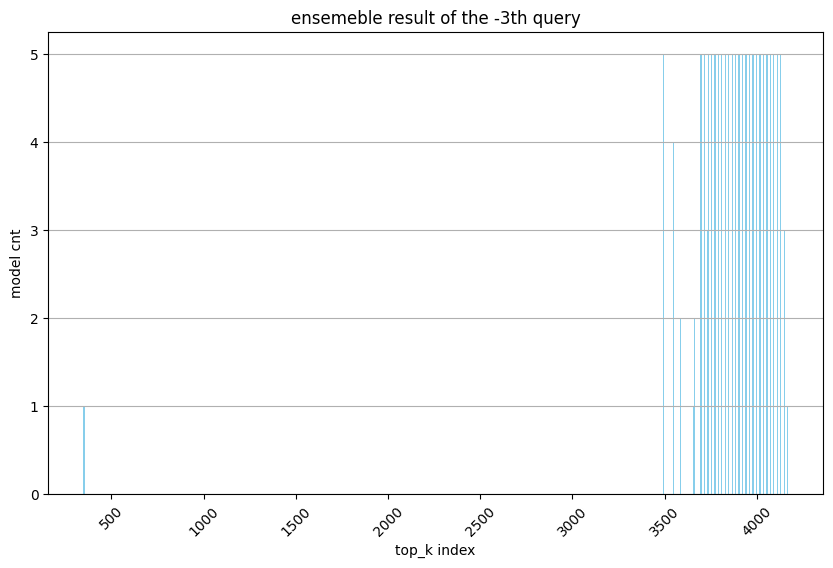

<Figure size 640x480 with 0 Axes>

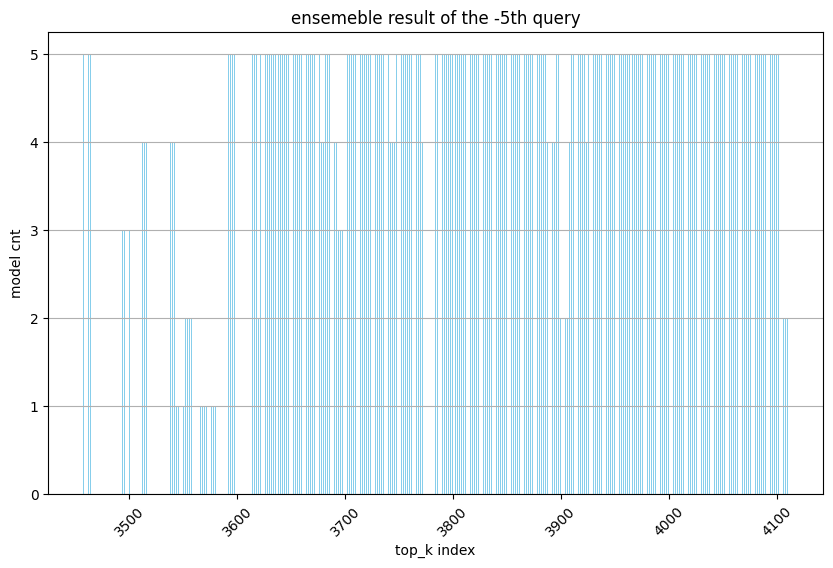

<Figure size 640x480 with 0 Axes>

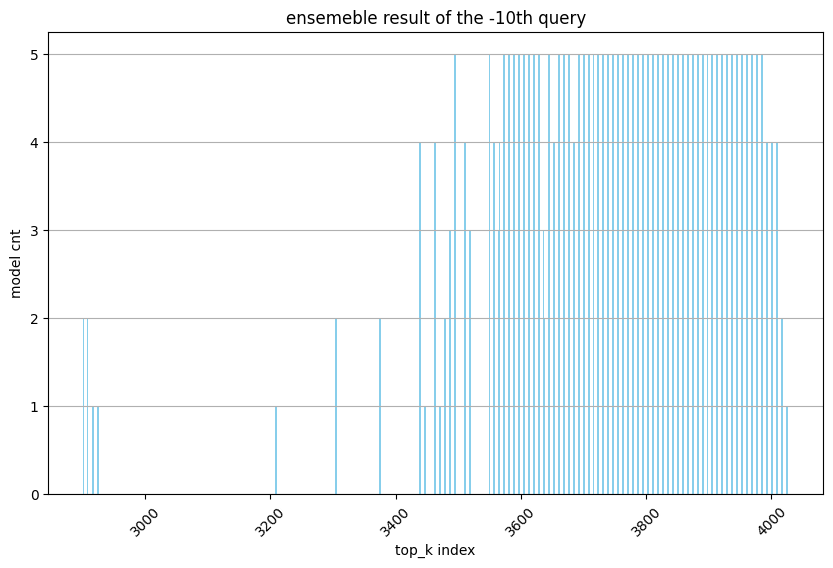

<Figure size 640x480 with 0 Axes>

In [15]:
import numpy as np

# Generate 10 random numbers between 0 and 5120
random_numbers = np.random.randint(0, 5120, size=10) # 5120 : N_H * TDST // block_size_q

for i in np.append(random_numbers,[0, 1, 2, 5, 10, -1, -2, -3, -5, -10]):
    plot(per_query_token_cnt_diclist, i)



In [34]:
def plot_cnt_per_query(val):
    print('val : ', val)
    ensemble_cnt_per_query = []
    for i, r in enumerate(per_query_token_cnt_diclist):
        per_query_cnt = sum(value == val for value in r.values())
        ensemble_cnt_per_query.append(per_query_cnt)

    print(ensemble_cnt_per_query)
    x = np.arange(len(ensemble_cnt_per_query))  # Create an array of indices matching the length of your values list
    y = np.array(ensemble_cnt_per_query)  # Convert your list of values into a NumPy array for plotting

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='.', linestyle='-', color='b')
    plt.title('')
    plt.xlabel('query')
    plt.ylabel(f'# of coomon tokens selected from {val} / 5 models')
    plt.grid(True)
    plt.show()

    return ensemble_cnt_per_query
    # os.makedirs('../../cache/llama/ensemeble/viz/per_query', exist_ok=True)
    # plt.savefig(f'../../cache/llama/ensemeble/viz/{val}_cnt.png')

val :  5
[202, 216, 204, 170, 216, 212, 197, 203, 228, 186, 186, 220, 195, 199, 192, 204, 171, 203, 178, 178, 169, 208, 168, 147, 173, 180, 191, 155, 166, 189, 200, 203, 162, 163, 161, 140, 183, 178, 155, 145, 166, 154, 186, 119, 165, 142, 137, 167, 164, 134, 187, 176, 124, 122, 116, 130, 112, 135, 144, 159, 159, 110, 161, 229, 97, 132, 137, 107, 145, 103, 80, 135, 79, 160, 121, 111, 121, 109, 119, 140, 114, 132, 111, 116, 92, 141, 150, 142, 144, 87, 137, 102, 109, 119, 125, 167, 83, 92, 134, 106, 93, 128, 121, 136, 128, 149, 136, 124, 94, 115, 113, 84, 134, 160, 126, 154, 117, 93, 106, 104, 126, 144, 128, 144, 161, 182, 137, 256, 210, 210, 202, 208, 216, 203, 177, 185, 142, 191, 198, 182, 195, 176, 185, 194, 198, 152, 142, 156, 167, 141, 183, 155, 65, 188, 188, 189, 172, 161, 115, 189, 180, 171, 164, 144, 164, 169, 172, 159, 176, 120, 125, 132, 166, 158, 162, 151, 123, 99, 140, 137, 166, 181, 130, 178, 154, 106, 144, 158, 138, 113, 150, 208, 152, 133, 100, 125, 146, 124, 118, 144, 85,

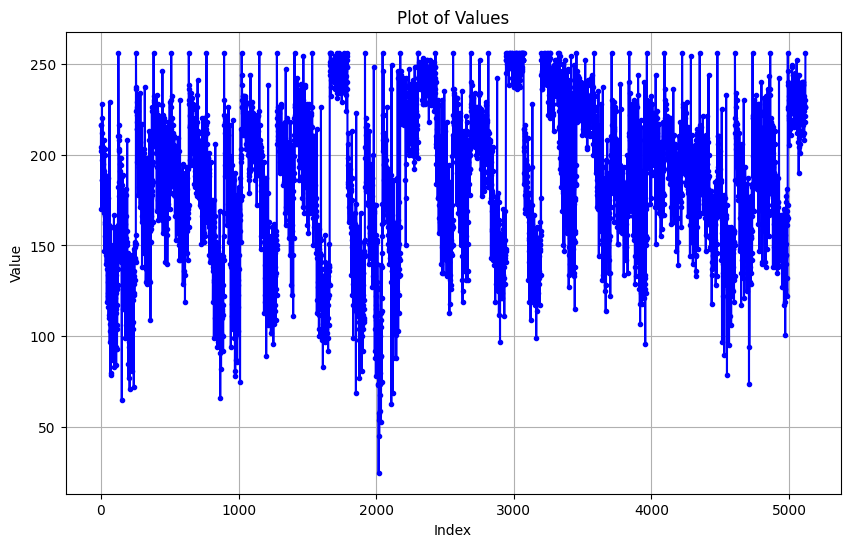

In [38]:
max_per_query = plot_cnt_per_query(max(per_query_token_cnt_diclist[0].values()))

In [39]:
dump_i =[]
for i, e in enumerate(max_per_query):
    if e==256:
        dump_i.append(i)
print(dump_i)

[127, 255, 383, 511, 639, 767, 895, 1023, 1151, 1279, 1407, 1535, 1663, 1664, 1670, 1712, 1727, 1769, 1791, 1919, 2047, 2175, 2303, 2304, 2431, 2559, 2687, 2815, 2943, 2949, 2965, 2970, 2975, 2986, 2989, 3007, 3015, 3019, 3020, 3037, 3038, 3055, 3056, 3059, 3063, 3068, 3070, 3071, 3199, 3223, 3230, 3244, 3248, 3262, 3263, 3322, 3327, 3455, 3583, 3711, 3839, 3967, 4095, 4223, 4351, 4479, 4607, 4735, 4863, 4991, 5119]


val :  4
[34, 22, 22, 37, 19, 14, 34, 31, 18, 48, 28, 14, 36, 23, 45, 35, 45, 15, 52, 30, 45, 22, 42, 66, 49, 47, 38, 38, 41, 29, 25, 33, 65, 52, 40, 60, 49, 48, 47, 51, 27, 59, 33, 81, 47, 66, 30, 39, 33, 45, 31, 52, 66, 81, 61, 58, 78, 74, 46, 58, 54, 72, 55, 27, 90, 77, 56, 82, 61, 92, 67, 65, 66, 48, 88, 67, 73, 61, 70, 78, 60, 75, 72, 79, 61, 61, 54, 60, 81, 61, 67, 93, 88, 82, 62, 68, 97, 70, 78, 59, 72, 84, 85, 67, 60, 77, 67, 72, 86, 75, 88, 99, 56, 50, 76, 76, 65, 106, 69, 80, 61, 71, 92, 53, 50, 26, 48, 0, 28, 30, 24, 34, 16, 25, 35, 39, 61, 31, 33, 34, 39, 33, 31, 31, 40, 61, 57, 37, 39, 64, 33, 55, 78, 34, 37, 24, 52, 64, 64, 47, 45, 42, 31, 38, 43, 33, 32, 51, 34, 63, 62, 55, 48, 57, 42, 77, 55, 80, 45, 70, 44, 32, 72, 39, 60, 60, 59, 50, 36, 90, 72, 48, 52, 63, 98, 78, 60, 79, 82, 63, 73, 67, 60, 65, 71, 88, 64, 65, 75, 61, 75, 77, 84, 49, 77, 63, 68, 67, 85, 79, 70, 73, 59, 95, 75, 82, 84, 66, 77, 55, 74, 84, 66, 51, 60, 59, 70, 88, 67, 64, 58, 93, 75, 62, 61, 38, 72, 59

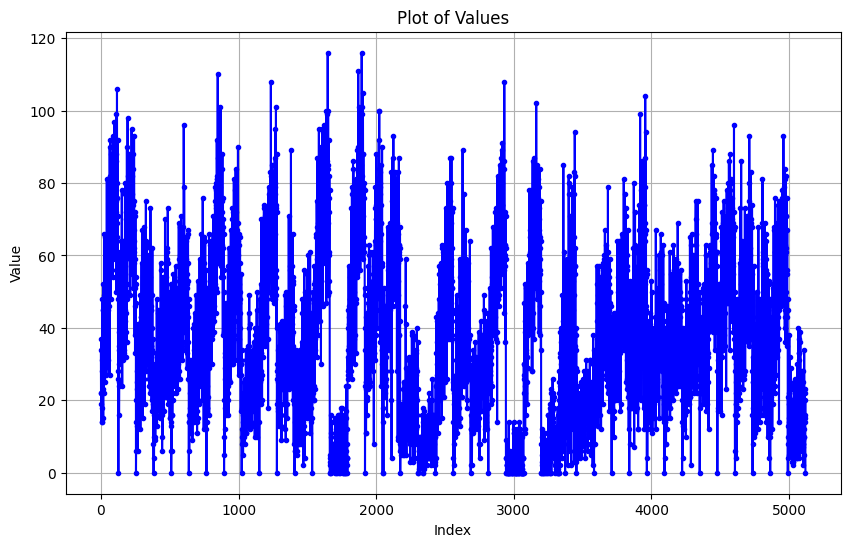

In [41]:
four = plot_cnt_per_query(4)

val :  3
[22, 26, 36, 53, 20, 17, 29, 24, 12, 30, 38, 11, 27, 28, 11, 21, 39, 23, 29, 46, 42, 18, 29, 27, 33, 17, 16, 47, 32, 34, 19, 21, 31, 30, 52, 55, 16, 32, 37, 53, 47, 32, 42, 49, 35, 37, 73, 47, 54, 73, 24, 24, 57, 41, 67, 61, 59, 41, 54, 28, 44, 66, 46, 0, 71, 38, 63, 49, 46, 56, 91, 57, 94, 48, 52, 61, 42, 54, 58, 41, 55, 44, 59, 57, 90, 50, 43, 56, 32, 76, 48, 37, 47, 60, 53, 30, 69, 79, 54, 80, 70, 28, 44, 51, 50, 23, 50, 49, 64, 68, 51, 62, 70, 42, 55, 20, 59, 64, 85, 78, 72, 56, 50, 37, 39, 44, 53, 0, 18, 12, 36, 9, 20, 22, 45, 30, 56, 35, 19, 49, 28, 43, 31, 31, 14, 43, 51, 42, 45, 33, 32, 46, 83, 35, 20, 35, 26, 19, 53, 14, 29, 48, 45, 55, 43, 35, 47, 38, 37, 58, 58, 50, 28, 41, 46, 22, 68, 72, 56, 47, 37, 41, 50, 34, 45, 73, 49, 35, 75, 46, 34, 0, 58, 51, 53, 51, 42, 45, 54, 48, 76, 89, 59, 81, 53, 70, 45, 35, 65, 97, 62, 52, 52, 61, 55, 57, 41, 63, 57, 40, 68, 43, 51, 31, 32, 43, 54, 60, 50, 74, 53, 32, 51, 71, 45, 73, 57, 62, 24, 89, 60, 34, 44, 48, 50, 69, 58, 54, 70

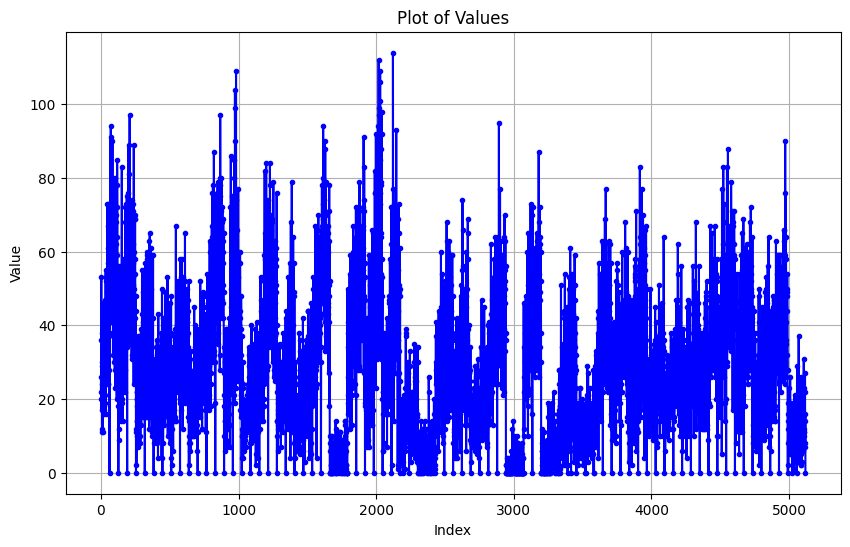

In [42]:
three = plot_cnt_per_query(3)

val :  2
[22, 12, 23, 42, 23, 33, 16, 27, 6, 14, 38, 21, 22, 30, 37, 16, 30, 43, 21, 34, 33, 26, 55, 58, 44, 42, 33, 59, 64, 33, 34, 9, 19, 49, 38, 39, 28, 18, 65, 58, 71, 48, 31, 61, 50, 52, 81, 45, 39, 66, 42, 28, 68, 56, 83, 81, 58, 51, 54, 45, 36, 64, 32, 0, 65, 57, 57, 72, 51, 58, 112, 43, 119, 48, 41, 82, 67, 88, 57, 39, 95, 59, 58, 64, 100, 45, 57, 41, 35, 104, 42, 87, 65, 46, 76, 16, 74, 82, 42, 92, 100, 70, 64, 51, 59, 46, 44, 60, 67, 57, 66, 87, 52, 50, 55, 49, 89, 39, 59, 49, 41, 28, 28, 85, 48, 36, 75, 0, 20, 22, 14, 27, 24, 34, 39, 35, 26, 19, 25, 29, 18, 39, 44, 29, 18, 37, 38, 78, 37, 53, 38, 36, 117, 21, 33, 36, 38, 44, 102, 34, 25, 33, 70, 72, 40, 53, 46, 48, 42, 74, 56, 79, 58, 37, 49, 32, 60, 72, 76, 52, 32, 29, 55, 34, 38, 82, 46, 49, 69, 50, 38, 0, 34, 65, 49, 59, 44, 57, 60, 40, 96, 123, 35, 101, 43, 68, 55, 61, 58, 124, 76, 57, 59, 52, 67, 55, 42, 76, 69, 52, 80, 60, 58, 40, 65, 86, 60, 61, 60, 123, 52, 52, 49, 95, 48, 46, 39, 51, 53, 125, 75, 63, 44, 89, 55, 77,

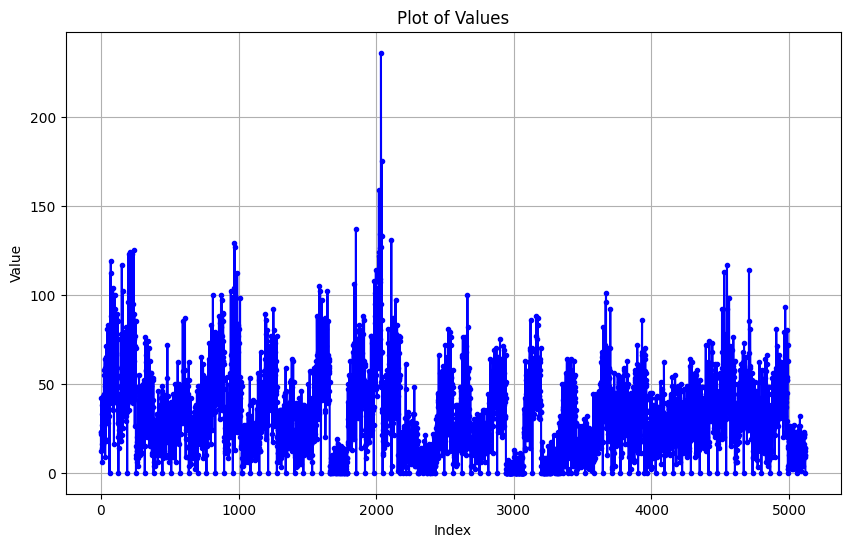

In [43]:
two = plot_cnt_per_query(2)

val :  1
[24, 10, 18, 39, 18, 47, 40, 15, 20, 40, 48, 49, 36, 49, 33, 25, 68, 50, 53, 64, 63, 46, 75, 84, 32, 57, 59, 94, 62, 51, 55, 52, 79, 69, 83, 97, 65, 66, 76, 76, 59, 82, 30, 92, 62, 91, 94, 58, 88, 79, 65, 64, 89, 111, 89, 53, 115, 84, 106, 79, 65, 116, 53, 27, 92, 84, 68, 126, 71, 113, 115, 88, 101, 48, 85, 110, 123, 153, 117, 67, 115, 70, 144, 85, 106, 91, 71, 80, 70, 165, 99, 113, 112, 85, 96, 51, 122, 139, 52, 90, 117, 80, 75, 77, 132, 66, 94, 105, 140, 87, 78, 104, 72, 54, 71, 48, 80, 121, 101, 108, 108, 52, 66, 67, 62, 62, 94, 0, 24, 30, 38, 23, 28, 31, 42, 39, 106, 58, 51, 29, 29, 61, 50, 35, 52, 73, 113, 70, 80, 114, 61, 75, 160, 57, 66, 62, 58, 74, 86, 37, 63, 47, 61, 99, 79, 92, 59, 71, 69, 106, 121, 92, 58, 65, 66, 87, 121, 105, 80, 70, 99, 66, 82, 64, 59, 127, 85, 87, 83, 117, 64, 48, 70, 80, 131, 72, 96, 95, 80, 84, 143, 114, 73, 105, 96, 97, 84, 73, 74, 142, 97, 112, 65, 72, 93, 87, 96, 91, 106, 105, 121, 94, 55, 87, 99, 116, 122, 64, 97, 187, 121, 69, 95, 133, 84

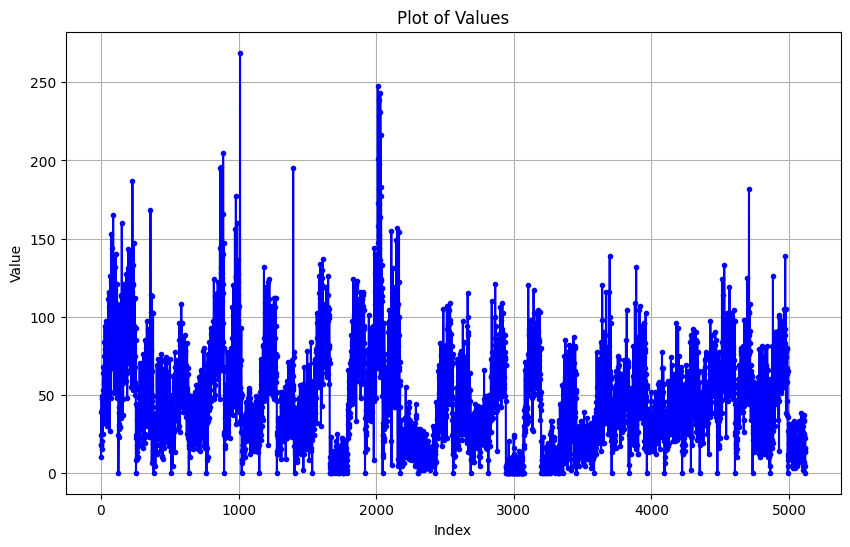

In [44]:
one = plot_cnt_per_query(1)